<a href="https://colab.research.google.com/github/ZaeemAkbarKhan786/MS_ProgrammingForAI/blob/main/bert_fine_tuning_mr_google_colab_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------------

# **Name:** 
  Muhammad Yaseen SP25-RAI-014 
  
  Zohaib Khan SP25-RAI-023
# **Course:** Programming for AI
# **Assignment #:** 03

-------------------------------------------------------------

**Base Paper Name:** Bert-Enhanced Text Graph Neural Network for Classification

## **Selected Dataset:**
**IMDB**

**Link:** https://www.kaggle.com/datasets/weipengfei/ohr8r52

# **Selected Paper links:**

**ResearchGate:** https://www.researchgate.net/publication/356388348_Bert-Enhanced_Text_Graph_Neural_Network_for_Classification


# **Base Paper Code:**
**Link:** https://github.com/pingpingand/BEGNN

**Importing Required Libraries**

In [154]:

import re
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
stopwords.words('english')
exclude = string.punctuation

[nltk_data] Downloading package wordnet to /Users/dgcars/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dgcars/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dgcars/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**Loading the Dataset**

In [155]:
tempdf = pd.read_csv('IMDB Dataset.csv')

**Checking Dataset Shape**

In [156]:
tempdf.shape

(50000, 2)

**Viewing the Dataset Head**

In [157]:
tempdf.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Selecting a Subset of Data**

In [158]:
df = tempdf.iloc[:1000]

**Viewing the Subset Data Head**

In [159]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Text PreProcessing Functions**

In [160]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

**Applying Preprocessing Steps**

In [161]:
df['review'] = df['review'].str.lower()

df['review'] = df['review'].apply(remove_html_tags)

df['review'] = df['review'].apply(remove_url)

df['review'] = df['review'].apply(remove_punc)

/var/folders/z0/1fxdjjns6_j8hq3gx04wpyrh0000gn/T/ipykernel_37183/3066941191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()
/var/folders/z0/1fxdjjns6_j8hq3gx04wpyrh0000gn/T/ipykernel_37183/3066941191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_html_tags)
/var/folders/z0/1fxdjjns6_j8hq3gx04wpyrh0000gn/T/ipykernel_37183/3066941191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

**Viewing Preprocessed Data**

In [162]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


**Verifying Dataset Shape**

In [163]:
df.shape

(1000, 2)

**Importing TensorFlow and TensorFlow Hub**

In [164]:
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.backend.clear_session()

**Splitting Data into Features and Labels**

In [165]:
X = df['review']
Y = df['sentiment']

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Converting Training Data to TensorFlow Tensors**

In [166]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.string)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32) 

**Loading BERT Preprocessing and Encoder from TensorFlow Hub**

In [ ]:
import tensorflow_hub as hub
import tensorflow_text  # Needed for BERT preprocessing ops

preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

**Defining the BERT FineTuning Model with Custom Classification**

In [168]:
class BertFineTuner(tf.keras.Model):
    def __init__(self, preprocessor, encoder):
        super(BertFineTuner, self).__init__()
        self.preprocessor = preprocessor
        self.encoder = encoder
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')  # binary output

    def call(self, inputs):
        x = self.preprocessor(inputs)
        x = self.encoder(x)['pooled_output']
        return self.classifier(x)

model = BertFineTuner(preprocessor, encoder)





**Compiling the BERT Model**

**Compiling Model with base paper setting**

In [169]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Computing Class Weights and Setting Up Early Stopping for Training**

In [171]:
from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

y_array = y_train.numpy() if isinstance(y_train, tf.Tensor) else y_train

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_array),
    y=y_array
)
class_weights_dict = dict(enumerate(class_weights))

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)




**Training Model with base paper setting**

In [172]:
model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=16,
    epochs=10,
    callbacks=[early_stopping],
    class_weight=class_weights_dict 
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.4686 - loss: 0.7060 - val_accuracy: 0.4688 - val_loss: 0.7049
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5149 - loss: 0.6939 - val_accuracy: 0.4688 - val_loss: 0.7026
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.4753 - loss: 0.6982 - val_accuracy: 0.4437 - val_loss: 0.7019
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.4895 - loss: 0.6973 - val_accuracy: 0.4688 - val_loss: 0.7013
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5103 - loss: 0.6950 - val_accuracy: 0.4625 - val_loss: 0.7010
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 178s 5s/step - accuracy: 0.4794 - loss: 0.6995 - val_accuracy: 0.4688 - val_loss: 0.7005
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.5090 - loss: 0.6940 - val_accuracy: 0.4812 - val_loss: 0.7001
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.4875 - loss: 0.6965 - val_accuracy: 0.4812 - val_los

**Evaulating Accuracy**

In [ ]:
import tensorflow as tf
import numpy as np


X_test = tf.convert_to_tensor(X_test, dtype=tf.string)

y_test = tf.convert_to_tensor(np.array(y_test), dtype=tf.float32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4905 - loss: 0.6959
Model Accuracy: 46.00%


**Compare Accuracy with Base Paper**

In [176]:
base_paper_accuracy = 86.42

print(f"BERT Model Accuracy: {accuracy * 100:.2f}%")
print(f"Base Paper Accuracy: {base_paper_accuracy}%")

BERT Model Accuracy: 46.00%
Base Paper Accuracy: 86.42%


**Generate Predictions for Confusion Matrix**

13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


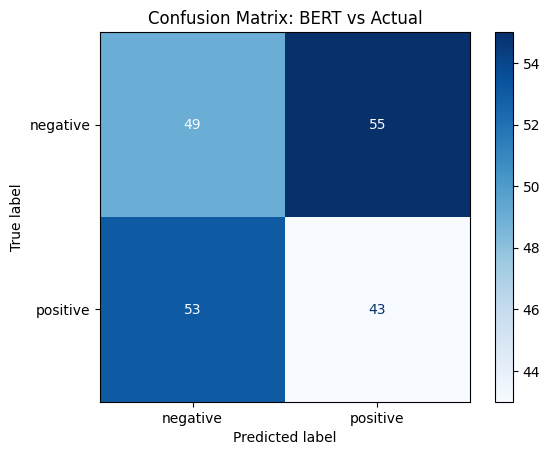

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

label_encoder = LabelEncoder()
label_encoder.fit(df['sentiment'])

y_pred = model.predict(X_test, batch_size=batch_size)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')

import matplotlib.pyplot as plt
plt.title("Confusion Matrix: BERT vs Actual")
plt.show()